# Imports And Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os
import yaml

In [2]:
!pip install -qq ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.5 MB/s eta 0:00:0000:0100:01


In [3]:
df = "/kaggle/input/multi-class-object-detection-challenge"

metadata = {
    "train" : f"{df}/Starter_Dataset/train/images",
    "val" : f"{df}/Starter_Dataset/val/images",
    "test" : f"{df}/testImages/images",
    "nc" : 2,
    "names" : ["cheerios", "soup"]
}

with open("metadata.yaml", "w") as file:
    yaml.dump(metadata, file)

In [4]:
train_imgs = "/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/images"
train_labels = "/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels"
val_imgs = "/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/images"
val_labels = "/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels"

In [5]:
train_labels = "/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels"
val_labels = "/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels"

def count_classes(label_path):
    c0 = c1 = 0
    for file in os.listdir(label_path):
        if not file.endswith('.txt'):
            continue
        with open(os.path.join(label_path, file), 'r') as f:
            for line in f:
                cls = line.strip().split()[0]
                if cls == '0': c0 += 1
                elif cls == '1': c1 += 1
    return c0, c1

t0, t1 = count_classes(train_labels)
v0, v1 = count_classes(val_labels)

print(f"Train images: {len(os.listdir(train_imgs))}")
print(f"Train: {t0} Cheerios, {t1} Soup")
print(f"Val images: {len(os.listdir(val_imgs))}")
print(f"Val: {v0} Cheerios, {v1} Soup")

Train images: 1000
Train: 565 Cheerios, 594 Soup
Val images: 95
Val: 88 Cheerios, 84 Soup


# Training The Model

In [6]:
from ultralytics import YOLO

model = YOLO('yolo11x.pt')
metadata = "/kaggle/working/metadata.yaml"

model.train(
    data = metadata,    # yaml configuration file
    epochs = 10,        
    # time = 0.083,
    # patience = 5,
    batch = 4,
    imgsz = 512,
    save = True,
    save_period = 5,   # Frequency of saving interim models
    device = 'cuda', # For GPU
    workers = 4,     # Number of worker threads
    project="/kaggle/working",    # project dir
    exist_ok = True,    # overwrite current model
    optimizer = "SGD",    # optimizer method
    seed = 12,    # seed for reproducibility
    multi_scale = True,    # scaling pictures
    cos_lr = True,   # cosine learning rate scheduler to move from lr0 to lrf
    close_mosaic = 5,   # disable mosaic data augmentation
    # resume = True,
    lr0 = 0.001,    # initial learning rate
    lrf = 0.0001,   # final learning rate
    weight_decay = 0.0001,    # regularization
    warmup_epochs = 2,    # warmup for lr0
    dropout = 0.5,
    plots = True,   # save plots of metrics
    box = 8.5,
    
    hsv_h = 0.025,   # hue
    hsv_s = 0.75,   # saturation
    hsv_v = 0.45,   # brightness
    degrees = 10,  # rotation
    translate = 0.05,   # translation
    scale = 0.5,   # scaling
    # shear = 10,    # shear
    perspective = 0.001,   # random perspective transformation
    flipud = 0.05,   # probability of flipping image vertically
    fliplr = 0.5,   # probability of flipping image horizontally
    bgr = 0.01,
    # mixup = 0.02,
    # cutmix = 0.01,
    # erasing = 0.1

    conf = 0.15,
    iou = 0.45
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 109M/109M [00:01<00:00, 114MB/s]  


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.01, box=8.5, cache=False, cfg=None, classes=None, close_mosaic=5, cls=0.5, conf=0.15, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/metadata.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.5, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.05, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.025, hsv_s=0.75, hsv_v=0.45, imgsz=512, int8=False, iou=0.45, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.0001, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x.pt, momentum=0.937, mosaic=1.0, multi_scale=True, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.001, plots=True, pose=12.

100%|██████████| 755k/755k [00:00<00:00, 26.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 98.4±54.9 MB/s, size: 5235.0 KB)


train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:15<00:00, 63.99it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.6±3.5 ms, read: 135.7±28.5 MB/s, size: 11532.5 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:03<00:00, 26.20it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to /kaggle/working/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0001), 173 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /kaggle/working/train
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.29G      1.208      2.735      1.186         12        384: 100%|██████████| 250/250 [01:47<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]

                   all         95        172      0.825       0.66      0.788      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.38G       1.15      1.166      1.115         11        544: 100%|██████████| 250/250 [01:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.42it/s]

                   all         95        172      0.894      0.883      0.922      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.46G      1.132     0.8829      1.083         15        672: 100%|██████████| 250/250 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]

                   all         95        172      0.881      0.843      0.893      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.55G      1.121     0.7276      1.078          7        672: 100%|██████████| 250/250 [01:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.41it/s]

                   all         95        172      0.917      0.834      0.912       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.64G      1.092     0.6744      1.077          9        352: 100%|██████████| 250/250 [01:46<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.33it/s]

                   all         95        172      0.922      0.863      0.911      0.689


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.73G     0.9383       0.55     0.9952          3        384: 100%|██████████| 250/250 [01:39<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]

                   all         95        172      0.899      0.906      0.891       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.82G     0.8925     0.5072     0.9721          4        320: 100%|██████████| 250/250 [01:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.42it/s]

                   all         95        172      0.898      0.882      0.908       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       7.9G     0.9016     0.4748     0.9809          4        448: 100%|██████████| 250/250 [01:36<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]

                   all         95        172      0.869        0.9      0.906      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.99G     0.8629     0.4459     0.9651          5        544: 100%|██████████| 250/250 [01:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]

                   all         95        172      0.882      0.863       0.91        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.35G      0.883     0.4436     0.9723          4        704: 100%|██████████| 250/250 [01:40<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]

                   all         95        172      0.852       0.91      0.914      0.699



10 epochs completed in 0.311 hours.
Optimizer stripped from /kaggle/working/train/weights/last.pt, 114.4MB
Optimizer stripped from /kaggle/working/train/weights/best.pt, 114.4MB

Validating /kaggle/working/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x summary (fused): 190 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.41it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.893      0.883      0.922      0.723
              cheerios         88         88      0.923       0.92      0.962      0.742
                  soup         84         84      0.863      0.845      0.882      0.704
Speed: 0.2ms preprocess, 18.4ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to /kaggle/working/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78772cebe550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [7]:
model = YOLO("/kaggle/working/train/weights/best.pt") 
metrics = model.val(data="/kaggle/working/metadata.yaml", imgsz=512, save=True, save_txt=True, save_conf=True,) 

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11x summary (fused): 190 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2615.2±751.4 MB/s, size: 10258.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:01<00:00, 72.63it/s] 

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:29<00:00,  4.89s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.934      0.842      0.911      0.693
              cheerios         88         88       0.97      0.898      0.951      0.719
                  soup         84         84      0.897      0.786      0.872      0.667
Speed: 2.1ms preprocess, 18.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


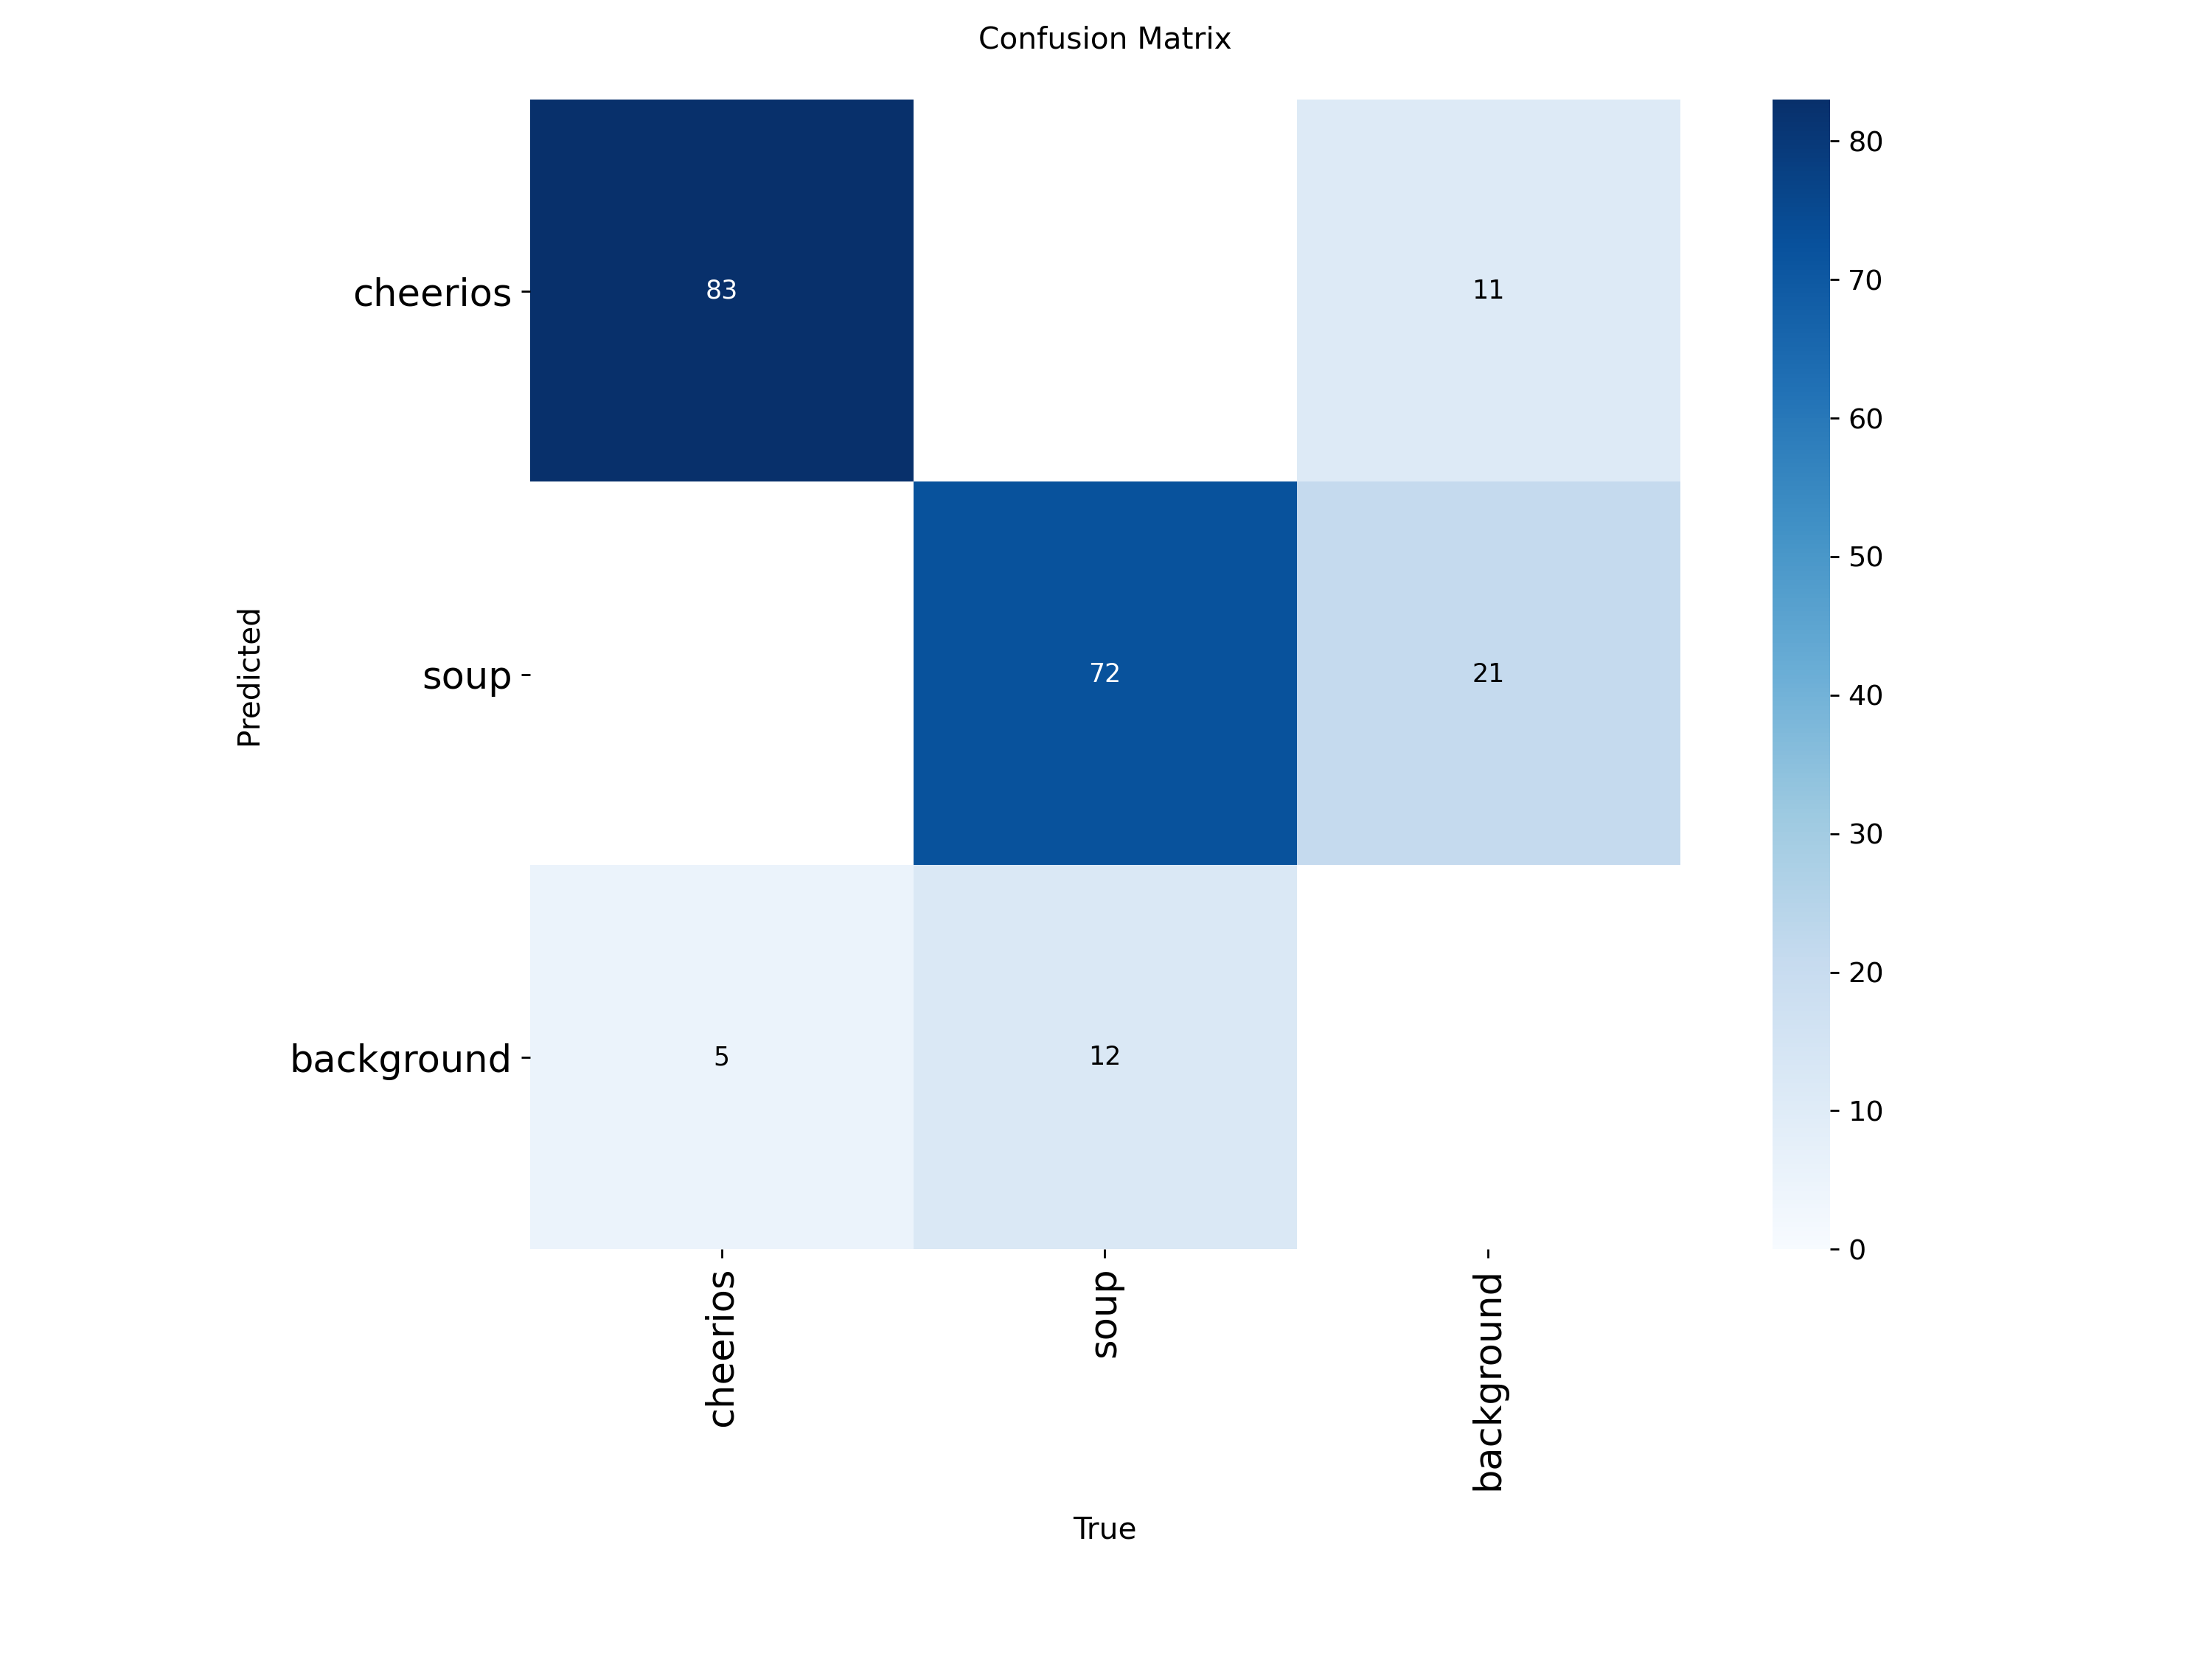

In [8]:
from IPython.display import Image, display

# display(Image(filename='/kaggle/working/train/results.png'))
display(Image(filename='/kaggle/working/train/confusion_matrix.png'))

In [9]:
num_classes = len(metrics.names)

print(f"mAP-50 score on validation dataset is {metrics.box.map50}")

for i in range(len(metrics.names)):
    p, r, ap50, ap = metrics.box.class_result(i)
    class_name = metrics.names[i]
    print(f"Class {i} ({class_name}): Precision={p:.3f}, Recall={r:.3f}, AP@0.5={ap50:.3f}, AP@.5:.95={ap:.3f}")


mAP-50 score on validation dataset is 0.9111799278137072
Class 0 (cheerios): Precision=0.970, Recall=0.898, AP@0.5=0.951, AP@.5:.95=0.719
Class 1 (soup): Precision=0.897, Recall=0.786, AP@0.5=0.872, AP@.5:.95=0.667


In [10]:
test_dir = "/kaggle/input/multi-class-object-detection-challenge/testImages/images"
results = model.predict(source=test_dir, save=True, save_txt=True, save_conf=True, name='predictions')


image 1/229 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8656.png: 512x384 1 cheerios, 1 soup, 52.0ms
image 2/229 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8657.png: 512x384 1 cheerios, 1 soup, 25.4ms
image 3/229 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8658.png: 512x384 1 cheerios, 25.4ms
image 4/229 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8659.png: 512x384 (no detections), 25.4ms
image 5/229 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8661.png: 512x384 1 cheerios, 25.4ms
image 6/229 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8662.png: 512x384 1 cheerios, 1 soup, 25.4ms
image 7/229 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8663.png: 512x384 1 cheerios, 1 soup, 25.4ms
image 8/229 /kaggle/input/multi-class-object-detection-challenge/testImages/images/IMG_8664.pn

In [11]:
# import os
# import pandas as pd

# # Path to YOLO predictions
# labels_dir = '/kaggle/working/predictions/labels'
# submission_data = []

# for filename in sorted(os.listdir(labels_dir)):
#     if not filename.endswith('.txt'):
#         continue

#     image_id = os.path.splitext(filename)[0]
#     file_path = os.path.join(labels_dir, filename)

#     with open(file_path, 'r') as f:
#         lines = f.readlines()

#     prediction_string = ''
#     for line in lines:
#         line = line.strip()
#         if line:
#             prediction_string += line + ' '

#     prediction_string = prediction_string.strip()
#     submission_data.append({'image_id': image_id, 'prediction_string': prediction_string})

# # Create dataframe
# submission_df = pd.DataFrame(submission_data)

# # Save to CSV
# submission_df.to_csv('submission.csv', index=False)

In [12]:
# !cat /kaggle/working/submission.csv

In [13]:
# !mkdir -p /kaggle/working/predictions
# !cp -r /kaggle/working/output/yolo_preds/labels /kaggle/working/predictions/

In [18]:
preds_path = '/kaggle/working/runs/detect/predictions/labels'

for fname in os.listdir(preds_path):
    full_path = os.path.join(preds_path, fname)
    with open(full_path, 'r') as f:
        lines = f.readlines()
    
    new_lines = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 6:
            cls, x, y, w, h, conf = parts
            new_line = f"{cls} {conf} {x} {y} {w} {h}\n"
            new_lines.append(new_line)
    
    with open(full_path, 'w') as f:
        f.writelines(new_lines)

In [19]:
!python /kaggle/input/multi-class-object-detection-challenge/convert_preds_to_csv.py \
--preds_folder /kaggle/working/runs/detect/predictions/labels \
--output_csv /kaggle/working/submission.csv \
--test_images_folder /kaggle/input/multi-class-object-detection-challenge/testImages/images

Found 229 test images

 Success! Submission saved to /kaggle/working/submission.csv
   Total predictions: 215
   Validation errors: 0


In [24]:
from pathlib import Path
import csv

def predictions_to_csv(
    preds_folder: str = "/kaggle/working/runs/detect/predictions/labels", 
    output_csv: str = "/kaggle/working/submission.csv", 
    test_images_folder: str = "/kaggle/input/multi-class-object-detection-challenge/Data/testImages/images",
    allowed_extensions: tuple = (".jpg", ".png", ".jpeg")
):
    preds_path = Path(preds_folder)
    test_images_path = Path(test_images_folder)

    test_images = {p.stem for p in test_images_path.glob("*") if p.suffix.lower() in allowed_extensions}

    predictions = []
    predicted_images = set()
    for txt_file in preds_path.glob("*.txt"):
        image_id = txt_file.stem
        predicted_images.add(image_id)

        with open(txt_file, "r") as f:
            valid_lines = [line.strip() for line in f if len(line.strip().split()) == 6]

        pred_str = " ".join(valid_lines) if valid_lines else "no boxes"
        predictions.append({"image_id": image_id, "prediction_string": pred_str})

    missing_images = test_images - predicted_images
    for image_id in missing_images:
        predictions.append({"image_id": image_id, "prediction_string": "no boxes"})
    submission_df = pd.DataFrame(predictions)
    submission_df.to_csv(output_csv, index=False, quoting=csv.QUOTE_MINIMAL)
    print(submission_df.shape)
    print(submission_df.head(10))
    print(f"[notice] ✅ Submission saved to {output_csv}")

predictions_to_csv()

(215, 2)
   image_id                                  prediction_string
0  IMG_8766  0 0.896986 0.59435 0.40672 0.297574 0.304027 1...
1  IMG_9917  1 0.954079 0.216276 0.462989 0.0927709 0.10983...
2  IMG_8974  0 0.877407 0.516944 0.46193 0.195079 0.141888 ...
3  IMG_9944     0 0.744365 0.455995 0.19756 0.0715942 0.084927
4  IMG_9902  0 0.703719 0.228483 0.642796 0.16178 0.12456 0...
5  IMG_9177  0 0.796464 0.346831 0.805717 0.302205 0.388566...
6  IMG_8723        0 0.720322 0.281183 0.50788 0.2107 0.317823
7  IMG_9163  0 0.902881 0.45226 0.399425 0.661051 0.435871 ...
8  IMG_8981  1 0.937657 0.203433 0.600305 0.139429 0.12255 ...
9  IMG_8797  1 0.864011 0.477032 0.627316 0.0603154 0.06868...
[notice] ✅ Submission saved to /kaggle/working/submission.csv


In [25]:
!head -n 5 /kaggle/working/submission.csv

image_id,prediction_string
IMG_8766,0 0.896986 0.59435 0.40672 0.297574 0.304027 1 0.78893 0.487639 0.503314 0.0663271 0.0875748 1 0.611423 0.386774 0.505837 0.0957856 0.0996981 1 0.469746 0.552699 0.523532 0.101729 0.114092 1 0.294955 0.452703 0.556688 0.10262 0.0851227
IMG_9917,1 0.954079 0.216276 0.462989 0.0927709 0.109837 0 0.381696 0.413941 0.565113 0.157215 0.201679
IMG_8974,0 0.877407 0.516944 0.46193 0.195079 0.141888 1 0.666127 0.339242 0.790225 0.0632492 0.0564611
IMG_9944,0 0.744365 0.455995 0.19756 0.0715942 0.084927
